## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div>

In [1]:
import pandas as pd      # pandas for data manipulation and analysis
import numpy as np       # numpy for numerical computing
import seaborn as sns    # seaborn for statistical data visualization
import matplotlib.pyplot as plt    # matplotlib for creating static visualizations
import matplotlib.ticker as ticker

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading Dataset </div> 

In [2]:
## Reading the data into the DataFrame
df = pd.read_csv('final.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis (EDA) </div> 

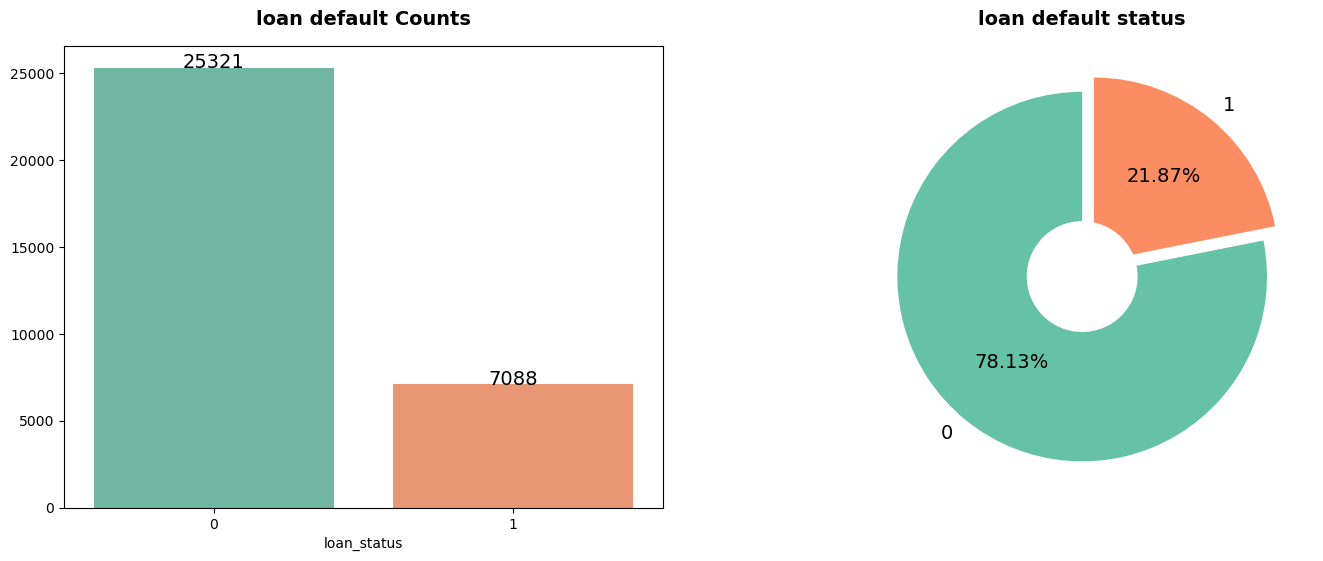

In [4]:
#Visualization to show loan default in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
loan_status = df["loan_status"].value_counts()
sns.barplot(x=loan_status.index,y=loan_status.values,palette= 'Set2')
plt.title("loan default Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(loan_status.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show loan default in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(loan_status))
plt.pie(loan_status, labels=["0","1"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("loan default status",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **25321 records (78.13%)** with a 0 loan default status and **7088 records (21.87%)** with a loan default status as 1.

In [5]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(22, 14))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('viridis', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 1]
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='viridis')
    plt.title(f"Loan Status by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)
    plt.xticks(rotation=45,ha='right')

    plt.tight_layout()
    plt.show()

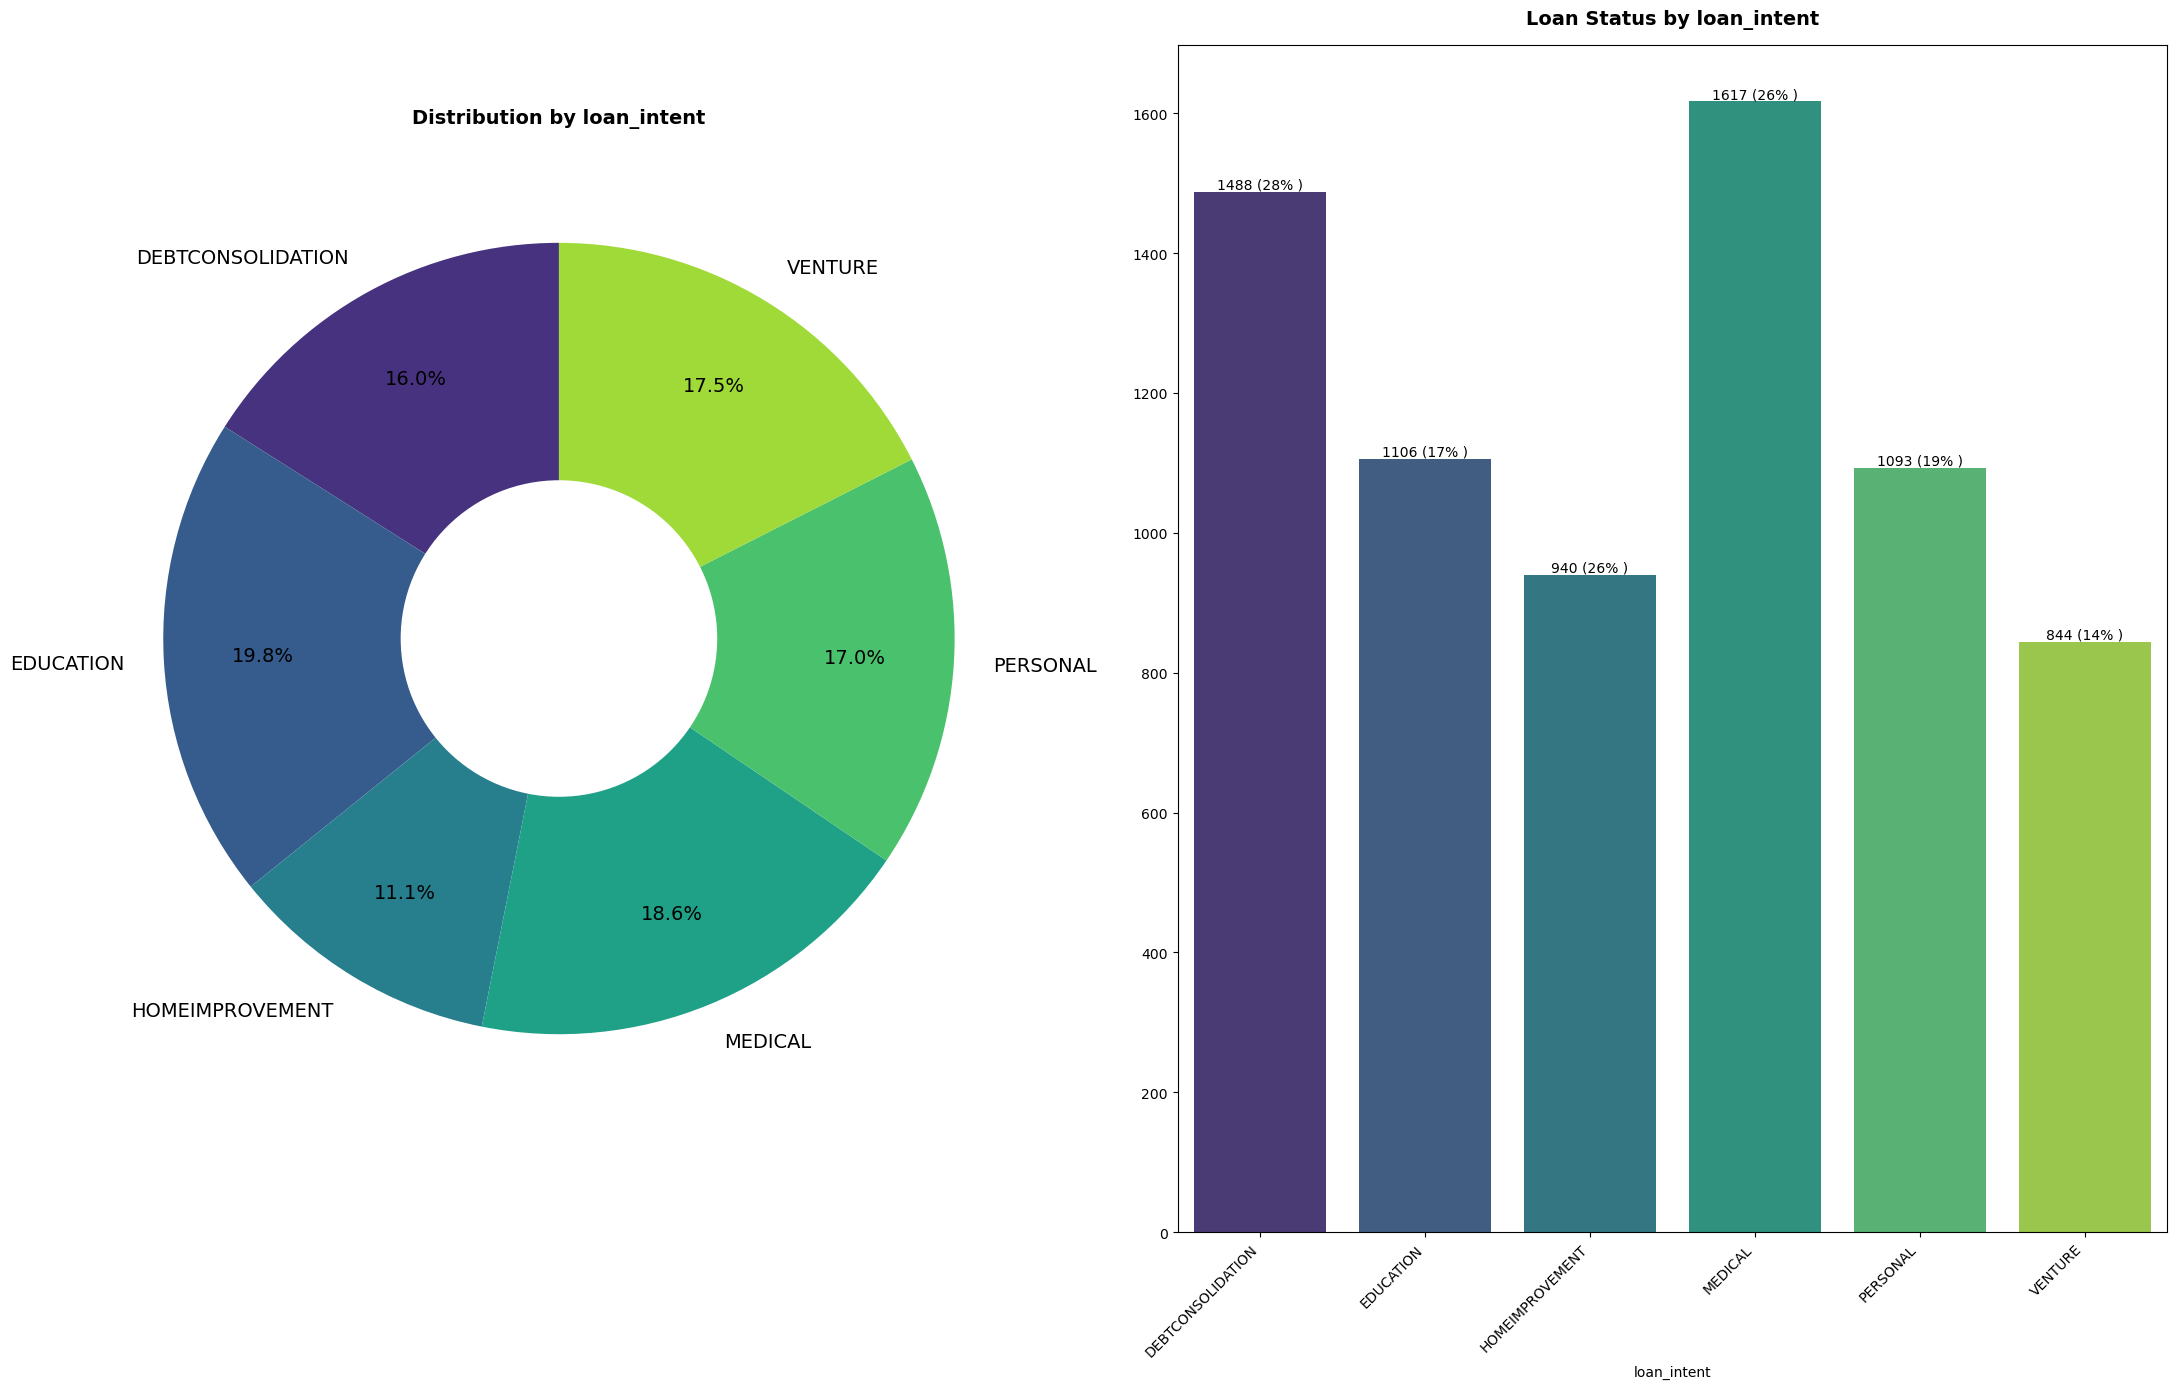

In [6]:
pie_bar_plot(df, 'loan_intent', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* **Education** purposes saw the **highest** frequency of loan acquisition, followed by Medical and ventures.
* Loan defaults were **most prevalent in medical loans**, followed by debt consolidation and education.

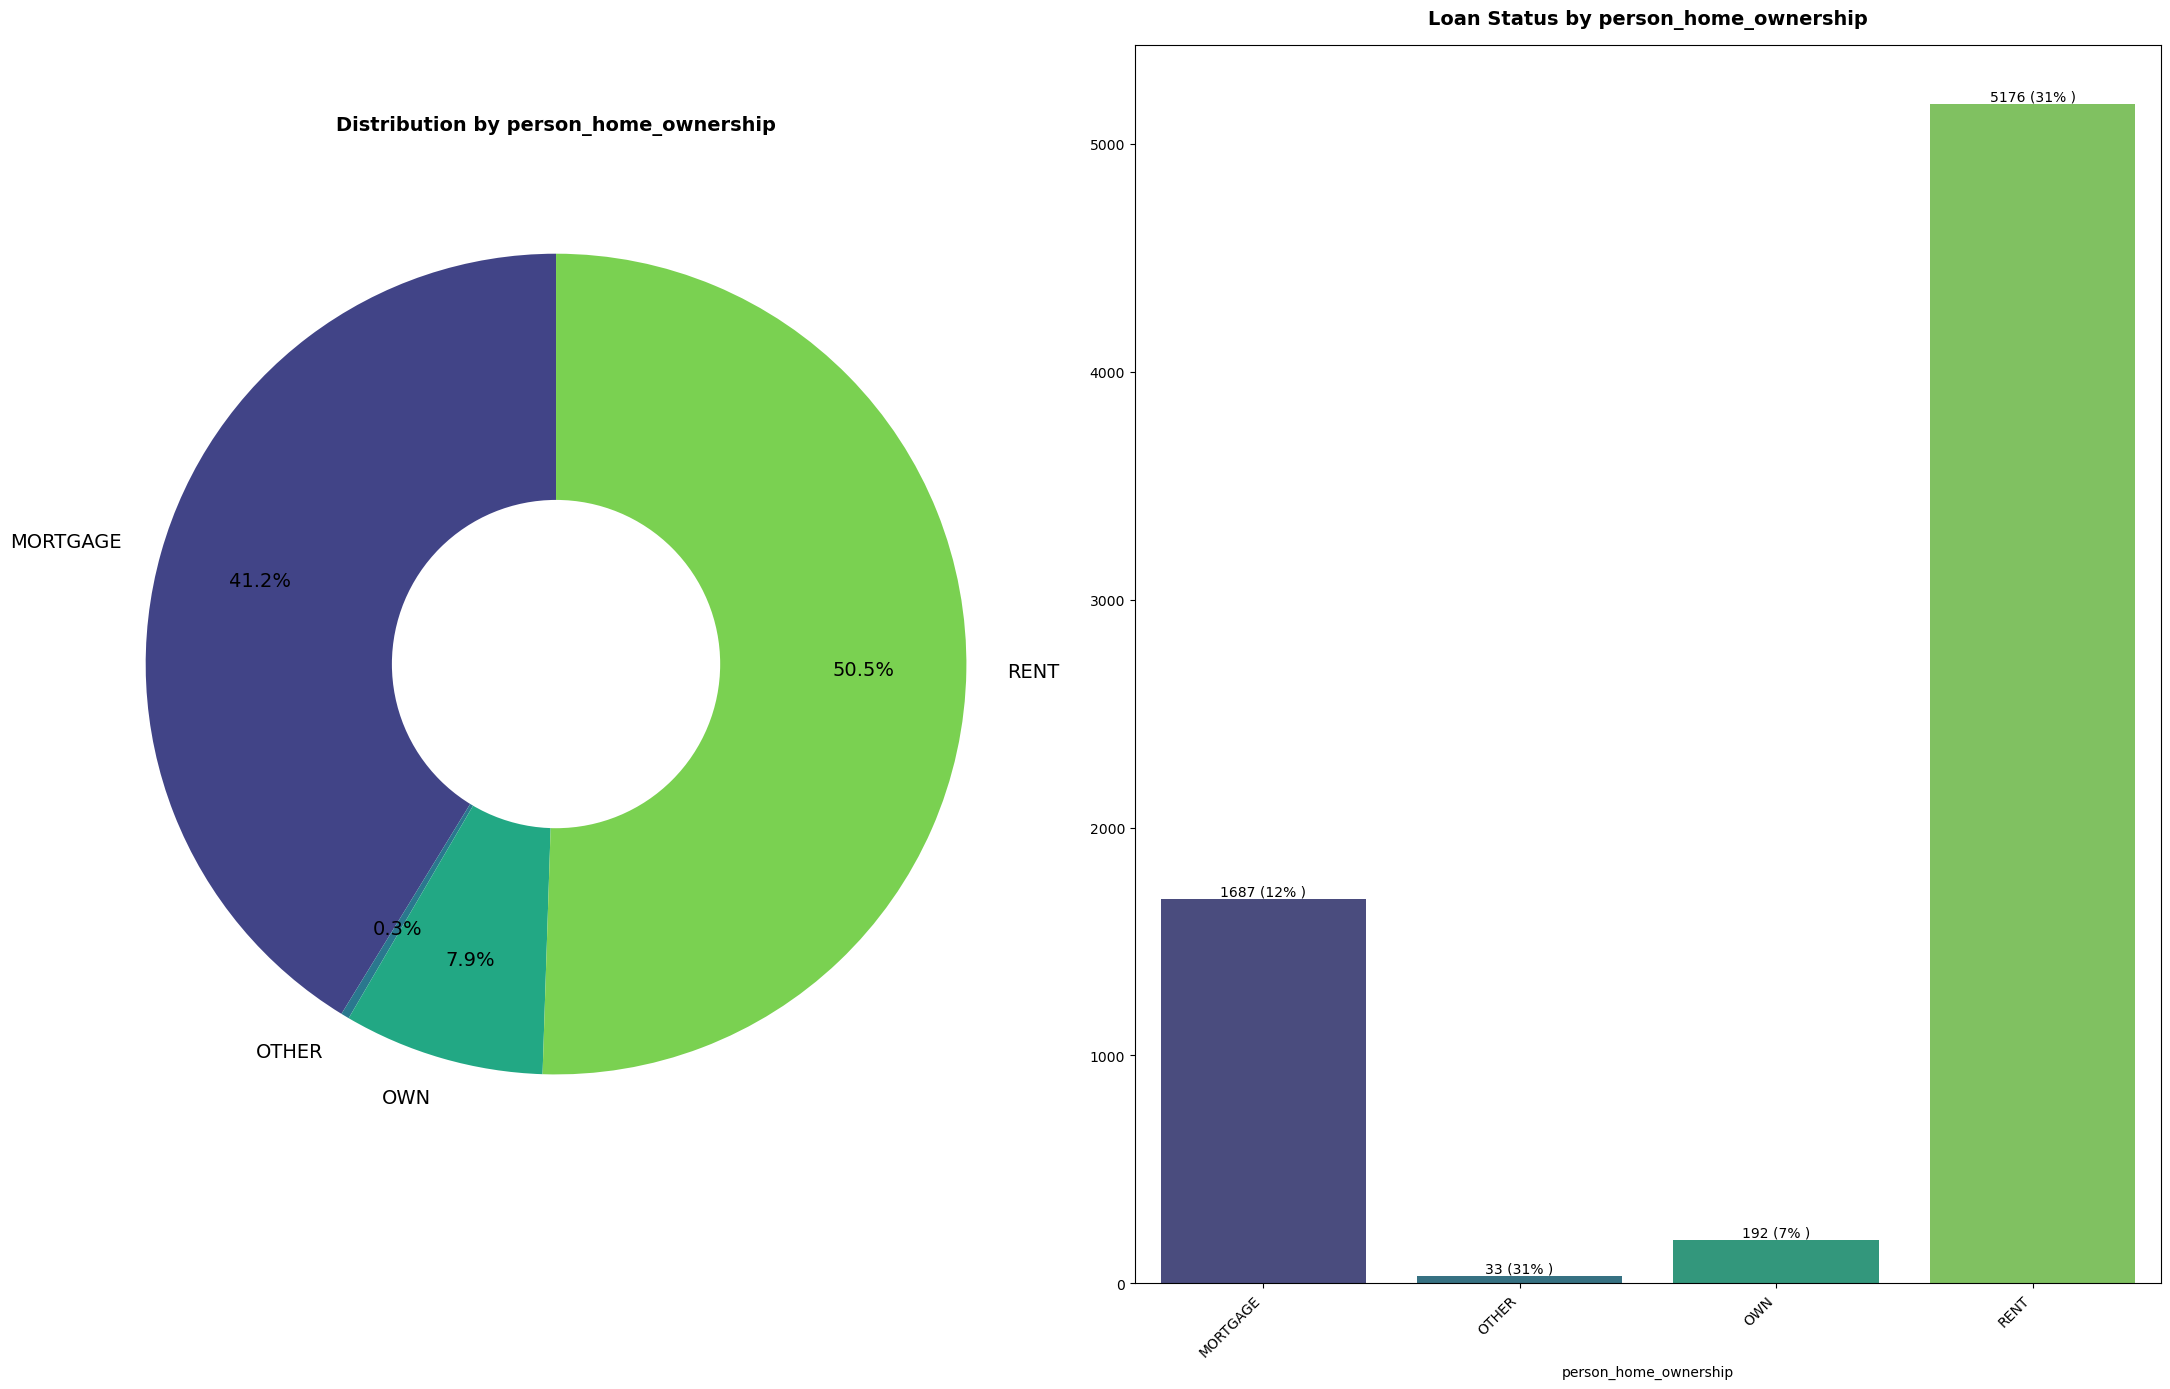

In [7]:
pie_bar_plot(df, 'person_home_ownership', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* **Rental** objectives exhibited the **greatest frequency of loan acquisition**, followed by mortgages and homeownership.
* Loan defaults were **most common among renters**, followed by mortgages and homeowners.

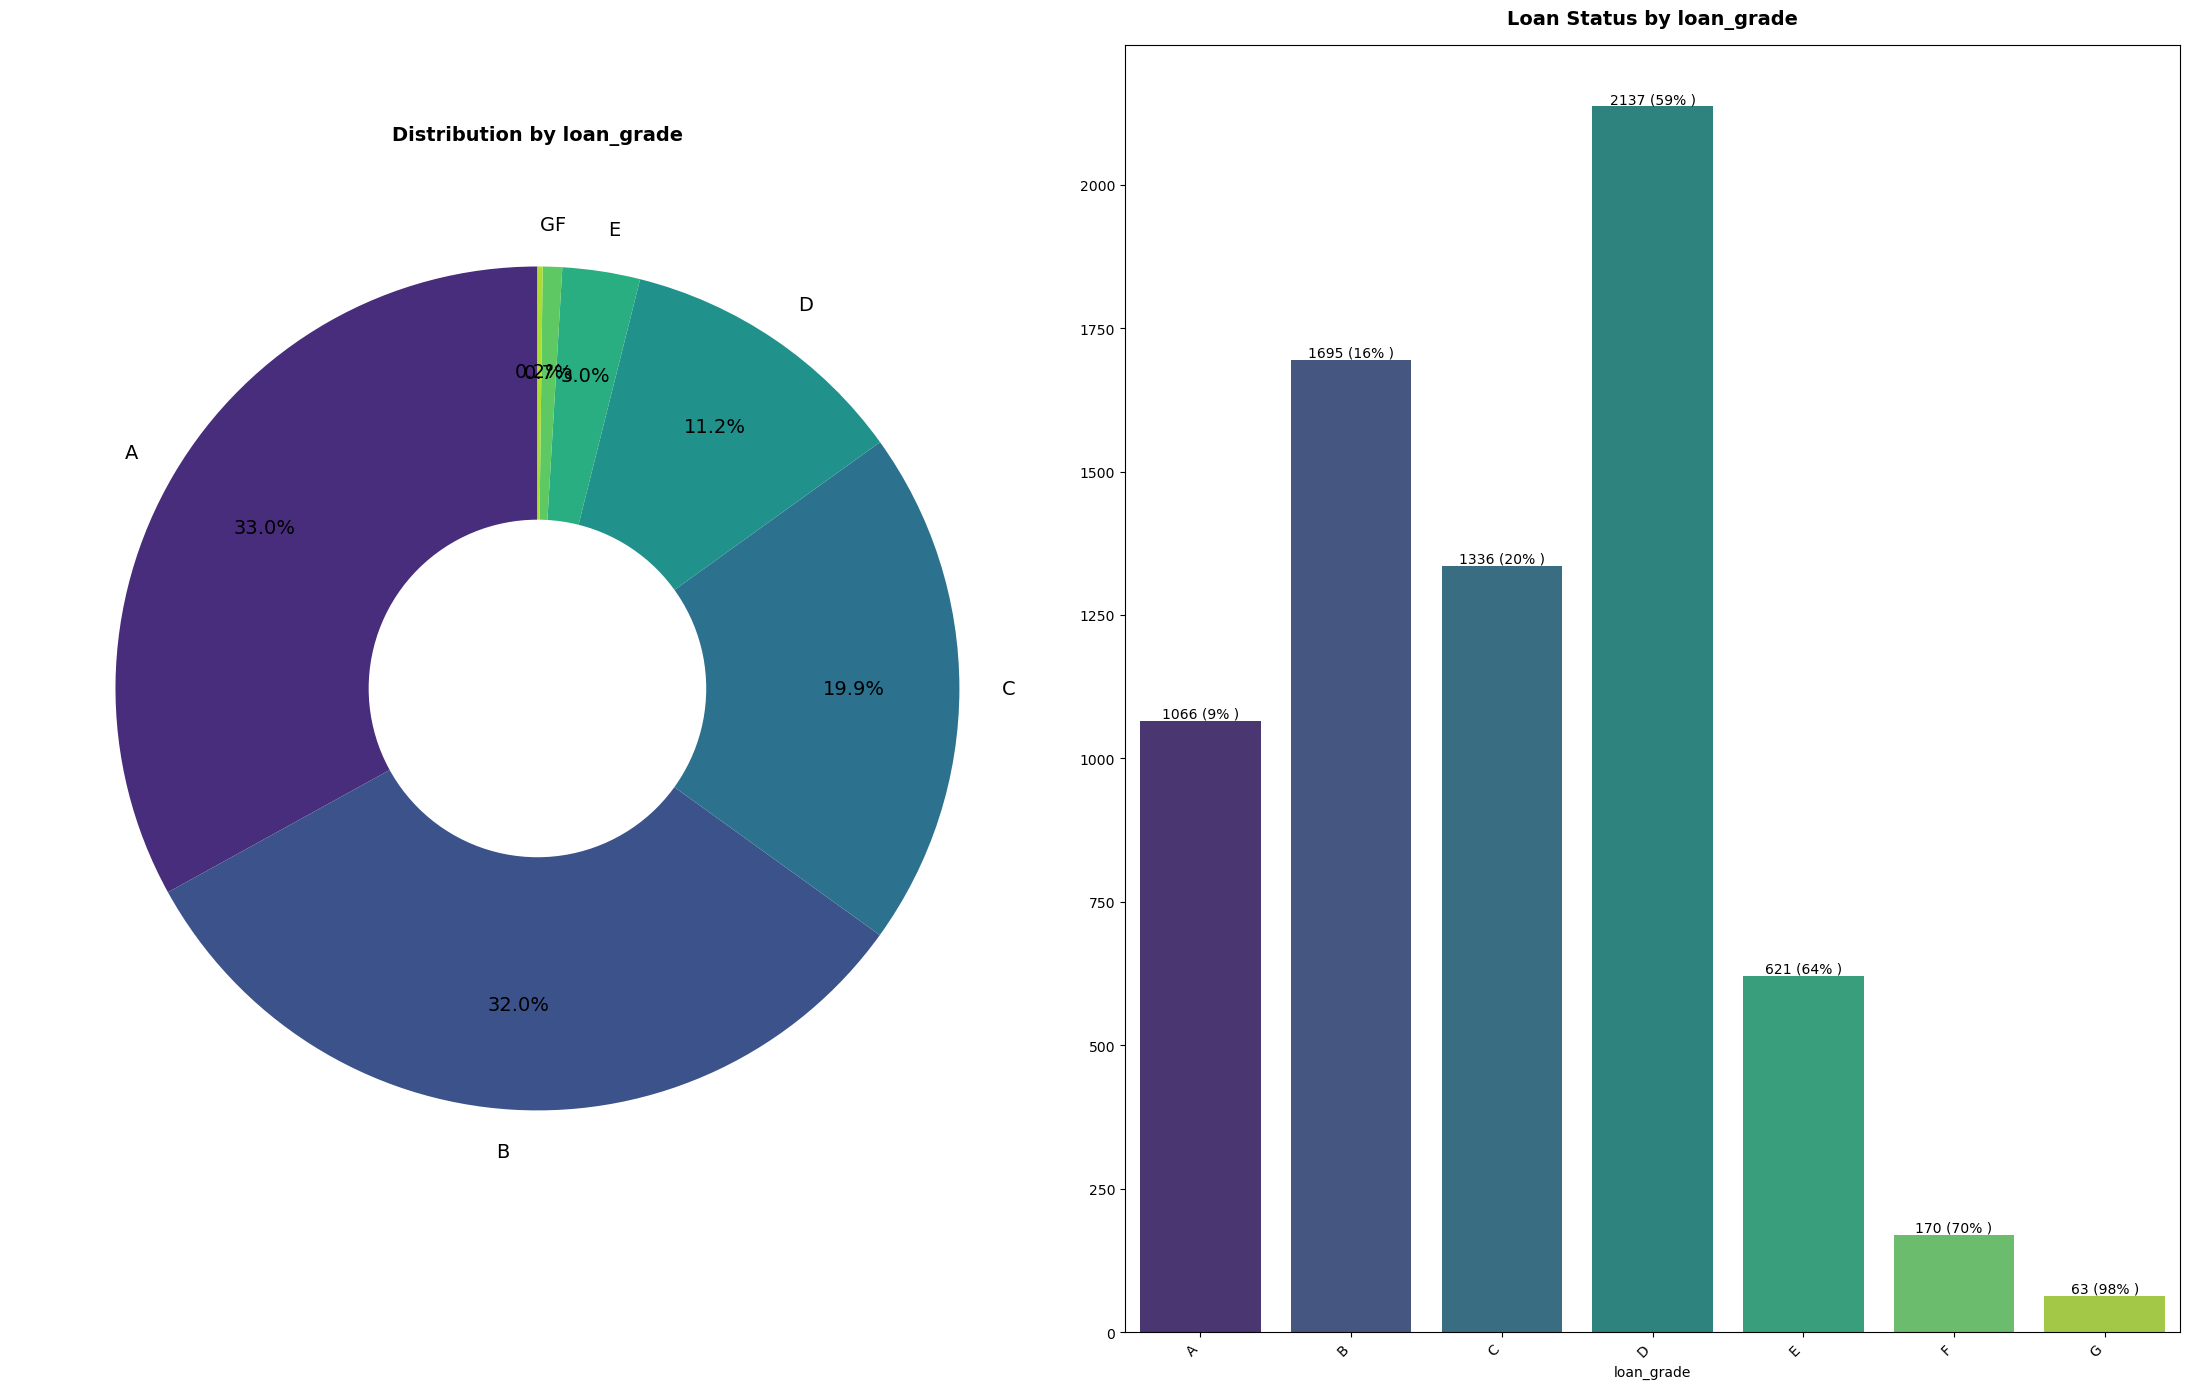

In [8]:
pie_bar_plot(df, 'loan_grade', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* **Loan Grade A** witnessed the **highest number of loans**, followed by Grades B and C.
* The **highest rate of loan defaults** was observed in **Grades D** followed by B and C.

In [9]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(20, 9))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 1]
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Loan Status by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)
    plt.xticks(rotation=45,ha='right')

    plt.tight_layout()
    plt.show()

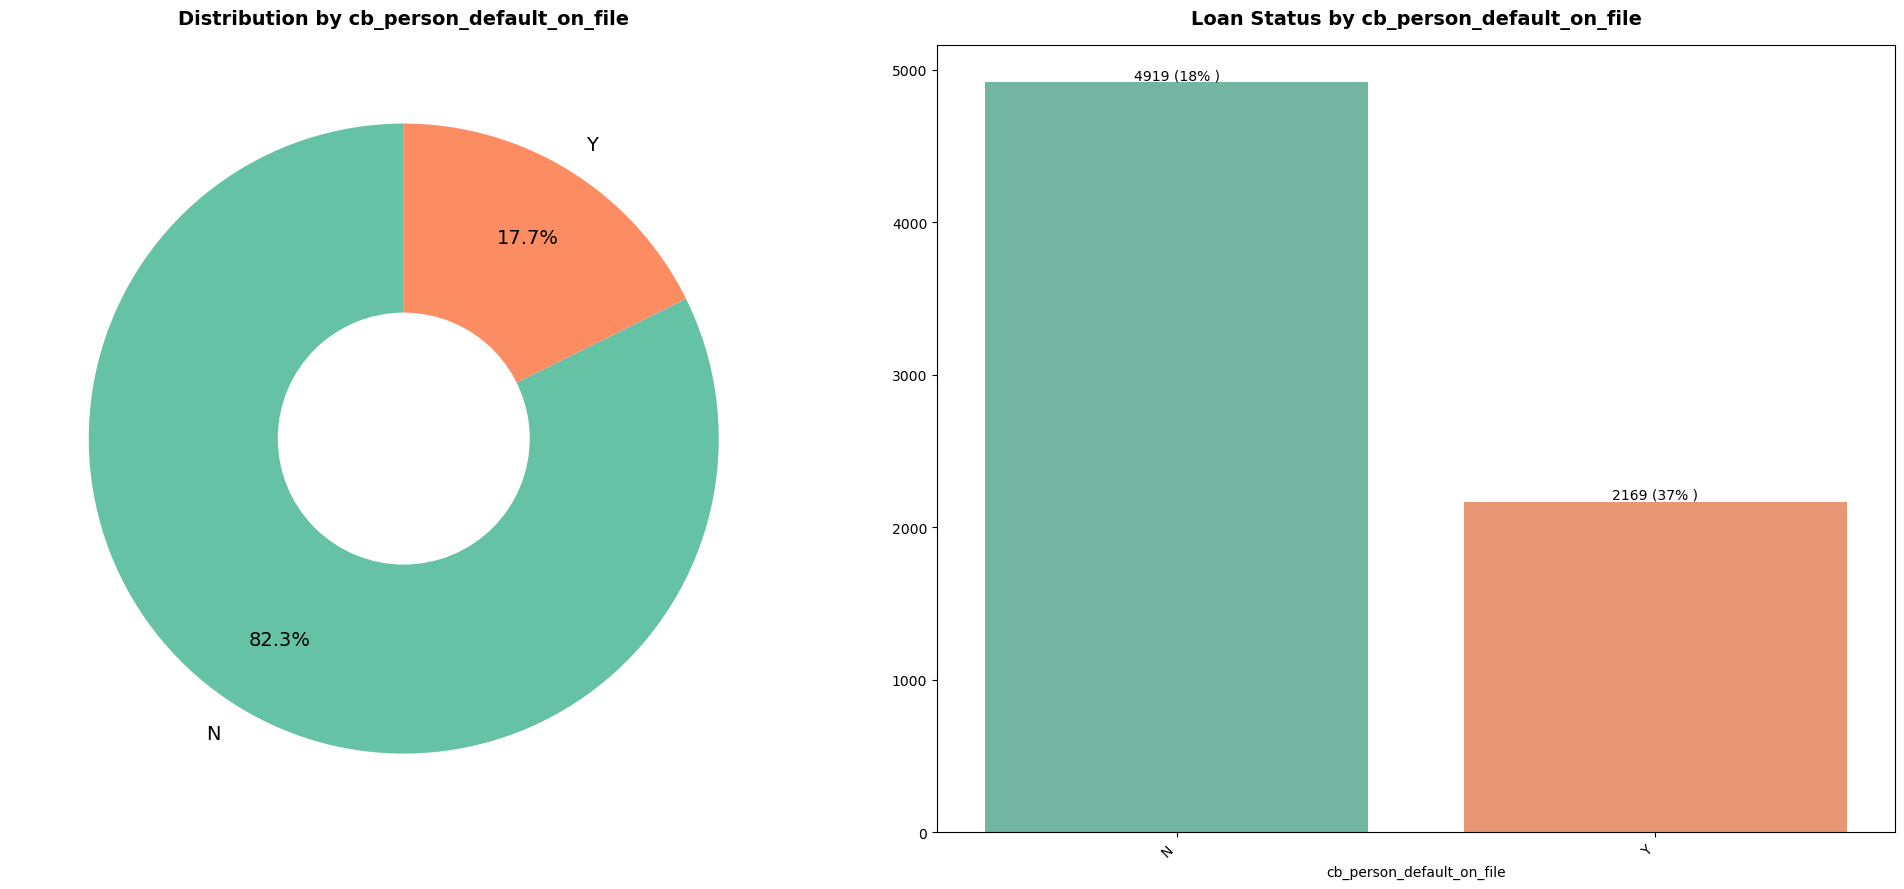

In [10]:
pie_bar_plot(df, 'cb_person_default_on_file', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>
    
* Among individuals with a historical **default status of "No"**, there is the **highest number of loans taken** and **loan defaults** also

In [11]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='viridis')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='viridis')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

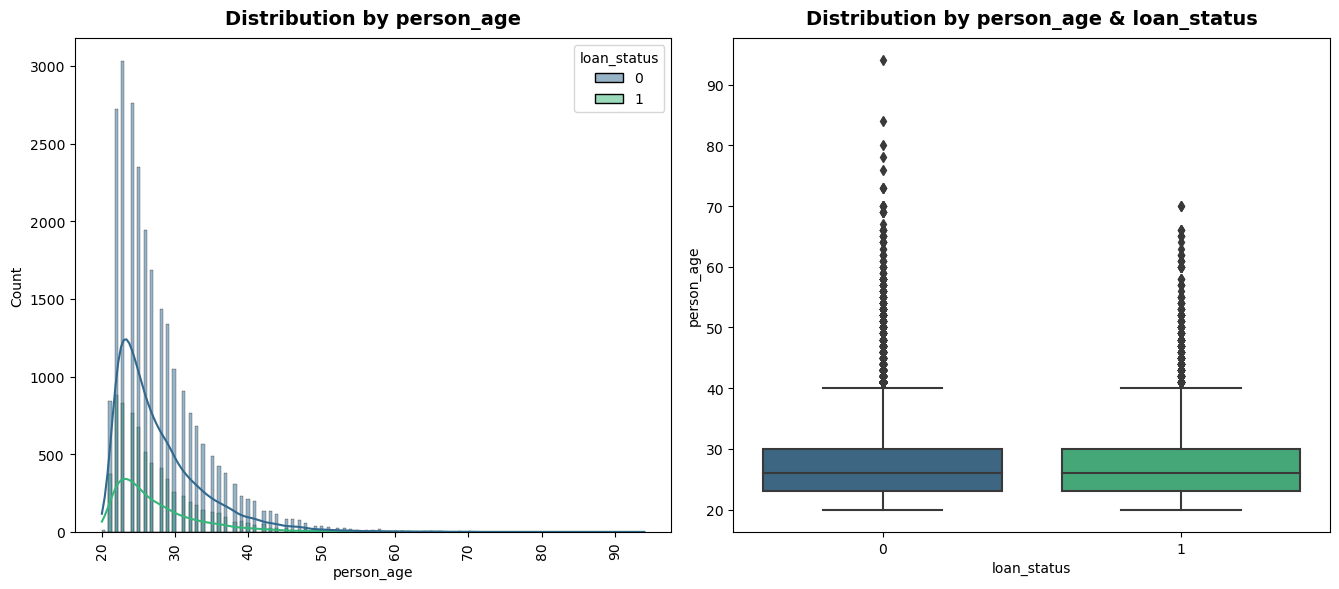

In [12]:
hist_with_hue(df, 'person_age', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* **younger individuals (around 20 to 30 years old)** tend to have a **higher likelihood of having a loan**. 
* default loans are relatively rare, especially among younger borrowers.
* Current loans (still active) show a consistent trend across age groups.

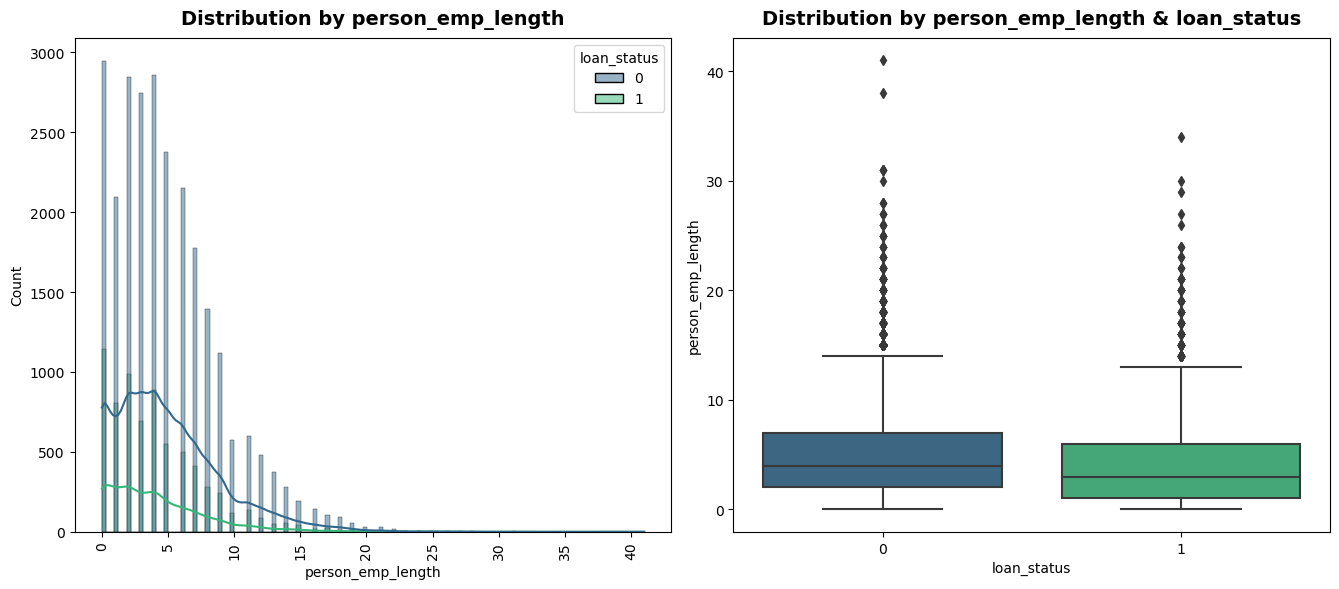

In [13]:
hist_with_hue(df, 'person_emp_length', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* For individuals with shorter employment lengths, there is a mix of **approved** and **rejected** loans.
* Among those with longer employment lengths, **approved loans** are more common.

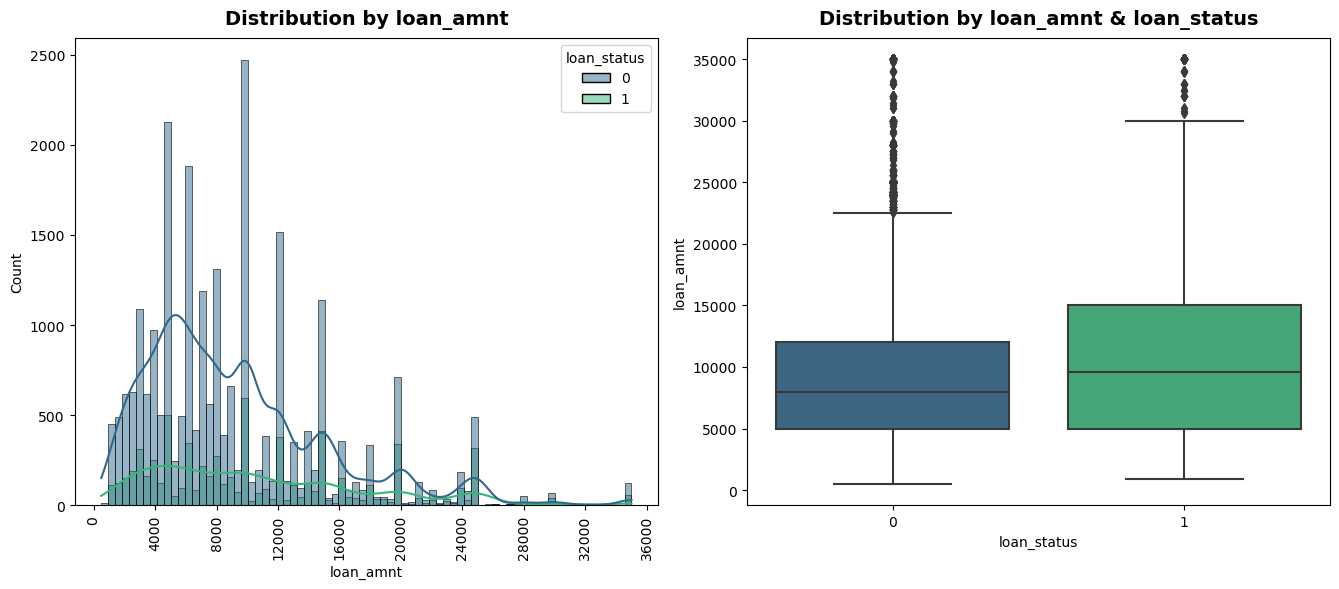

In [14]:
hist_with_hue(df, 'loan_amnt', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The majority of loans fall into the **smaller** range, with a peak around  amount **5,000**.
* There is a distinct peak around amount **10,000**, indicating a common loan amount for defaulted loans.

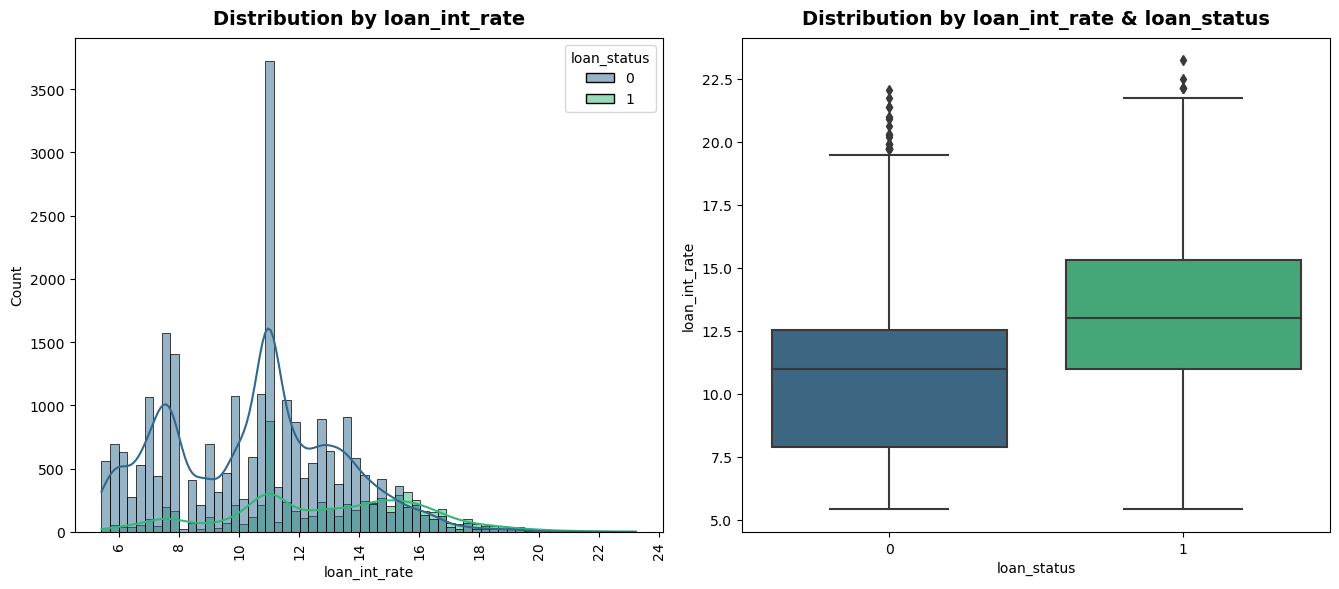

In [15]:
hist_with_hue(df, 'loan_int_rate', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>
    
1. Loan Interest Rate Distribution:
* The majority of loans fall within the **6% to 10%** interest rate range.
* There is a smaller peak around **15%**, indicating another cluster of loans.
* Fewer loans have interest rates above **20%**.
* Overall, the distribution is skewed to the right, with more loans having lower interest rates.
    
2. Loan Status Comparison:
* **Fully paid** loans tend to have lower interest rates, clustered around **7% to 12%**.
* **defaulted** loans show a broader distribution, with some reaching higher interest rates.

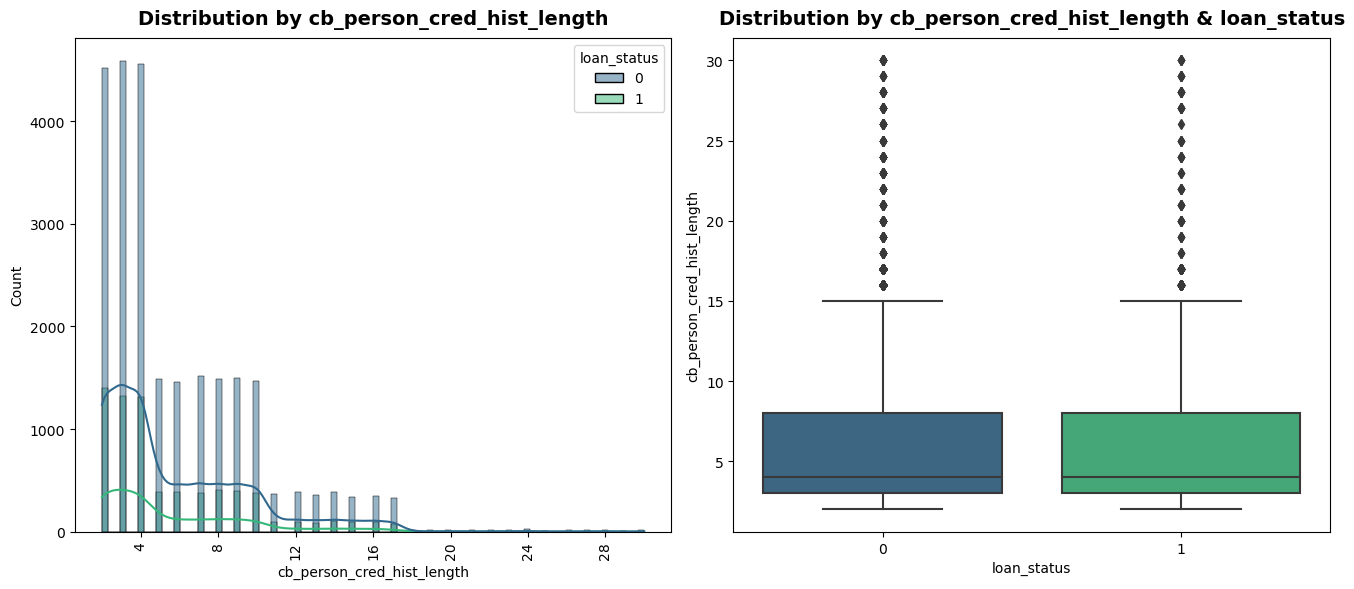

In [16]:
hist_with_hue(df, 'cb_person_cred_hist_length', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Loan status 0 is more prevalent among individuals with **longer credit histories**.
* Conversely, loan status 1 is more common for those with **shorter credit histories**.

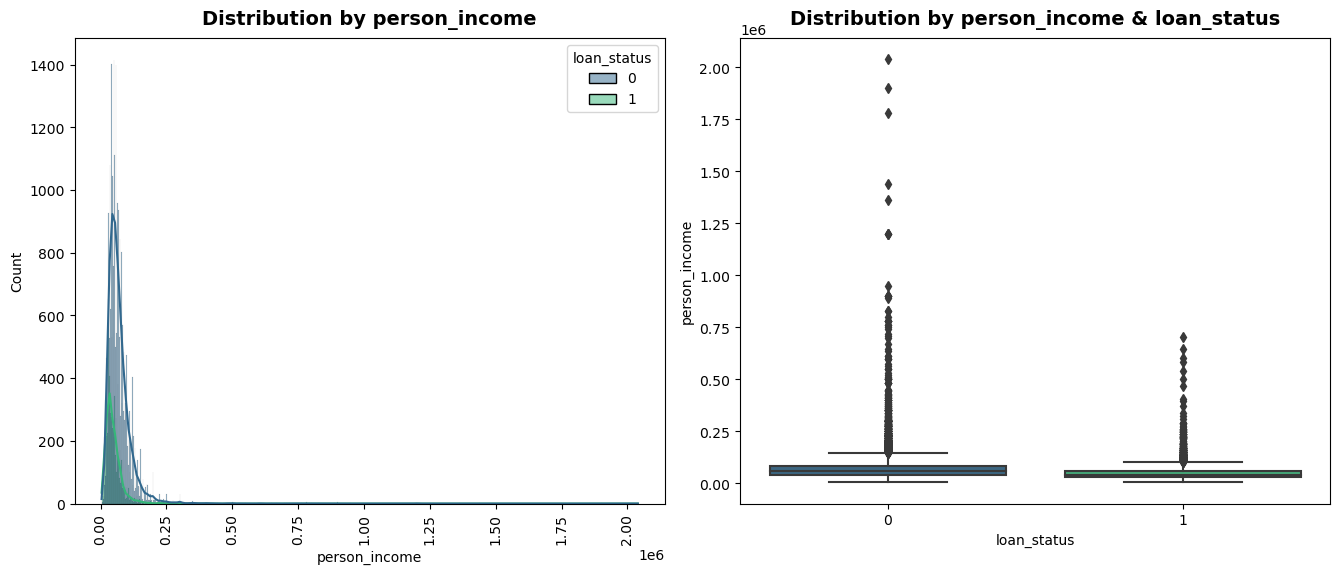

In [17]:
hist_with_hue(df, 'person_income', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Loan status 1 is more prevalent among individuals with **lower incomes**.

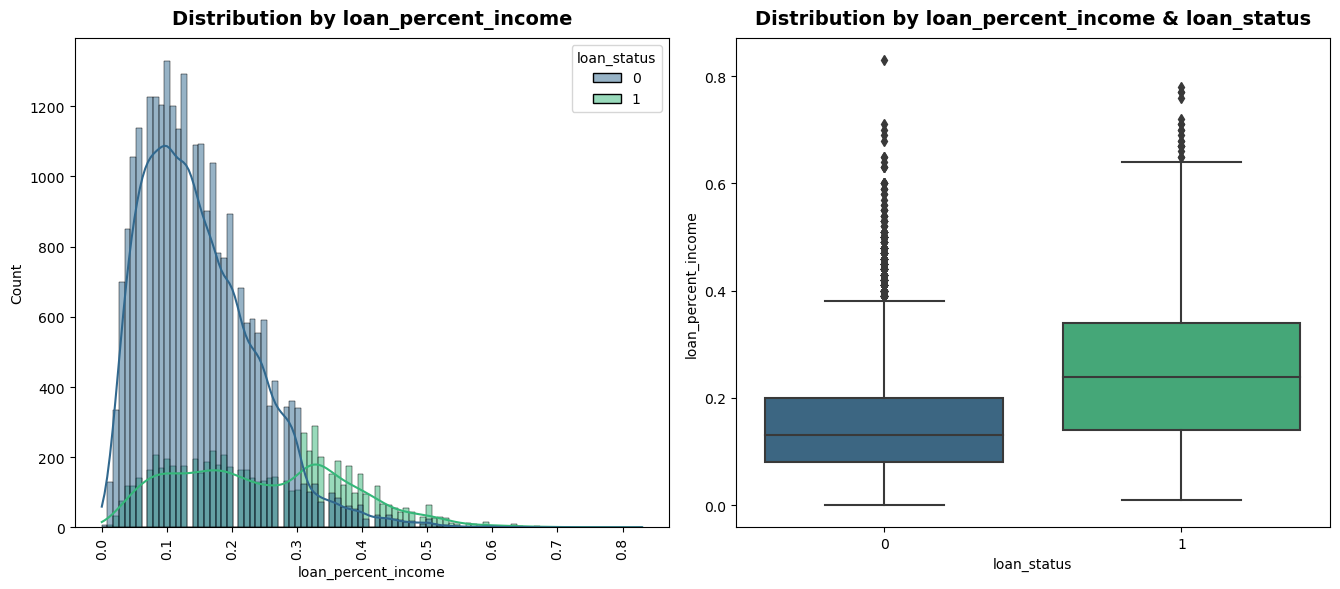

In [18]:
hist_with_hue(df, 'loan_percent_income', 'loan_status')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There appears to be a negative correlation between loan income percentage and the likelihood of loan default
* As income percentage increases, the probability of loan approval also tends to increase.
* Some outliers exist where high-income individuals were denied loans.

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

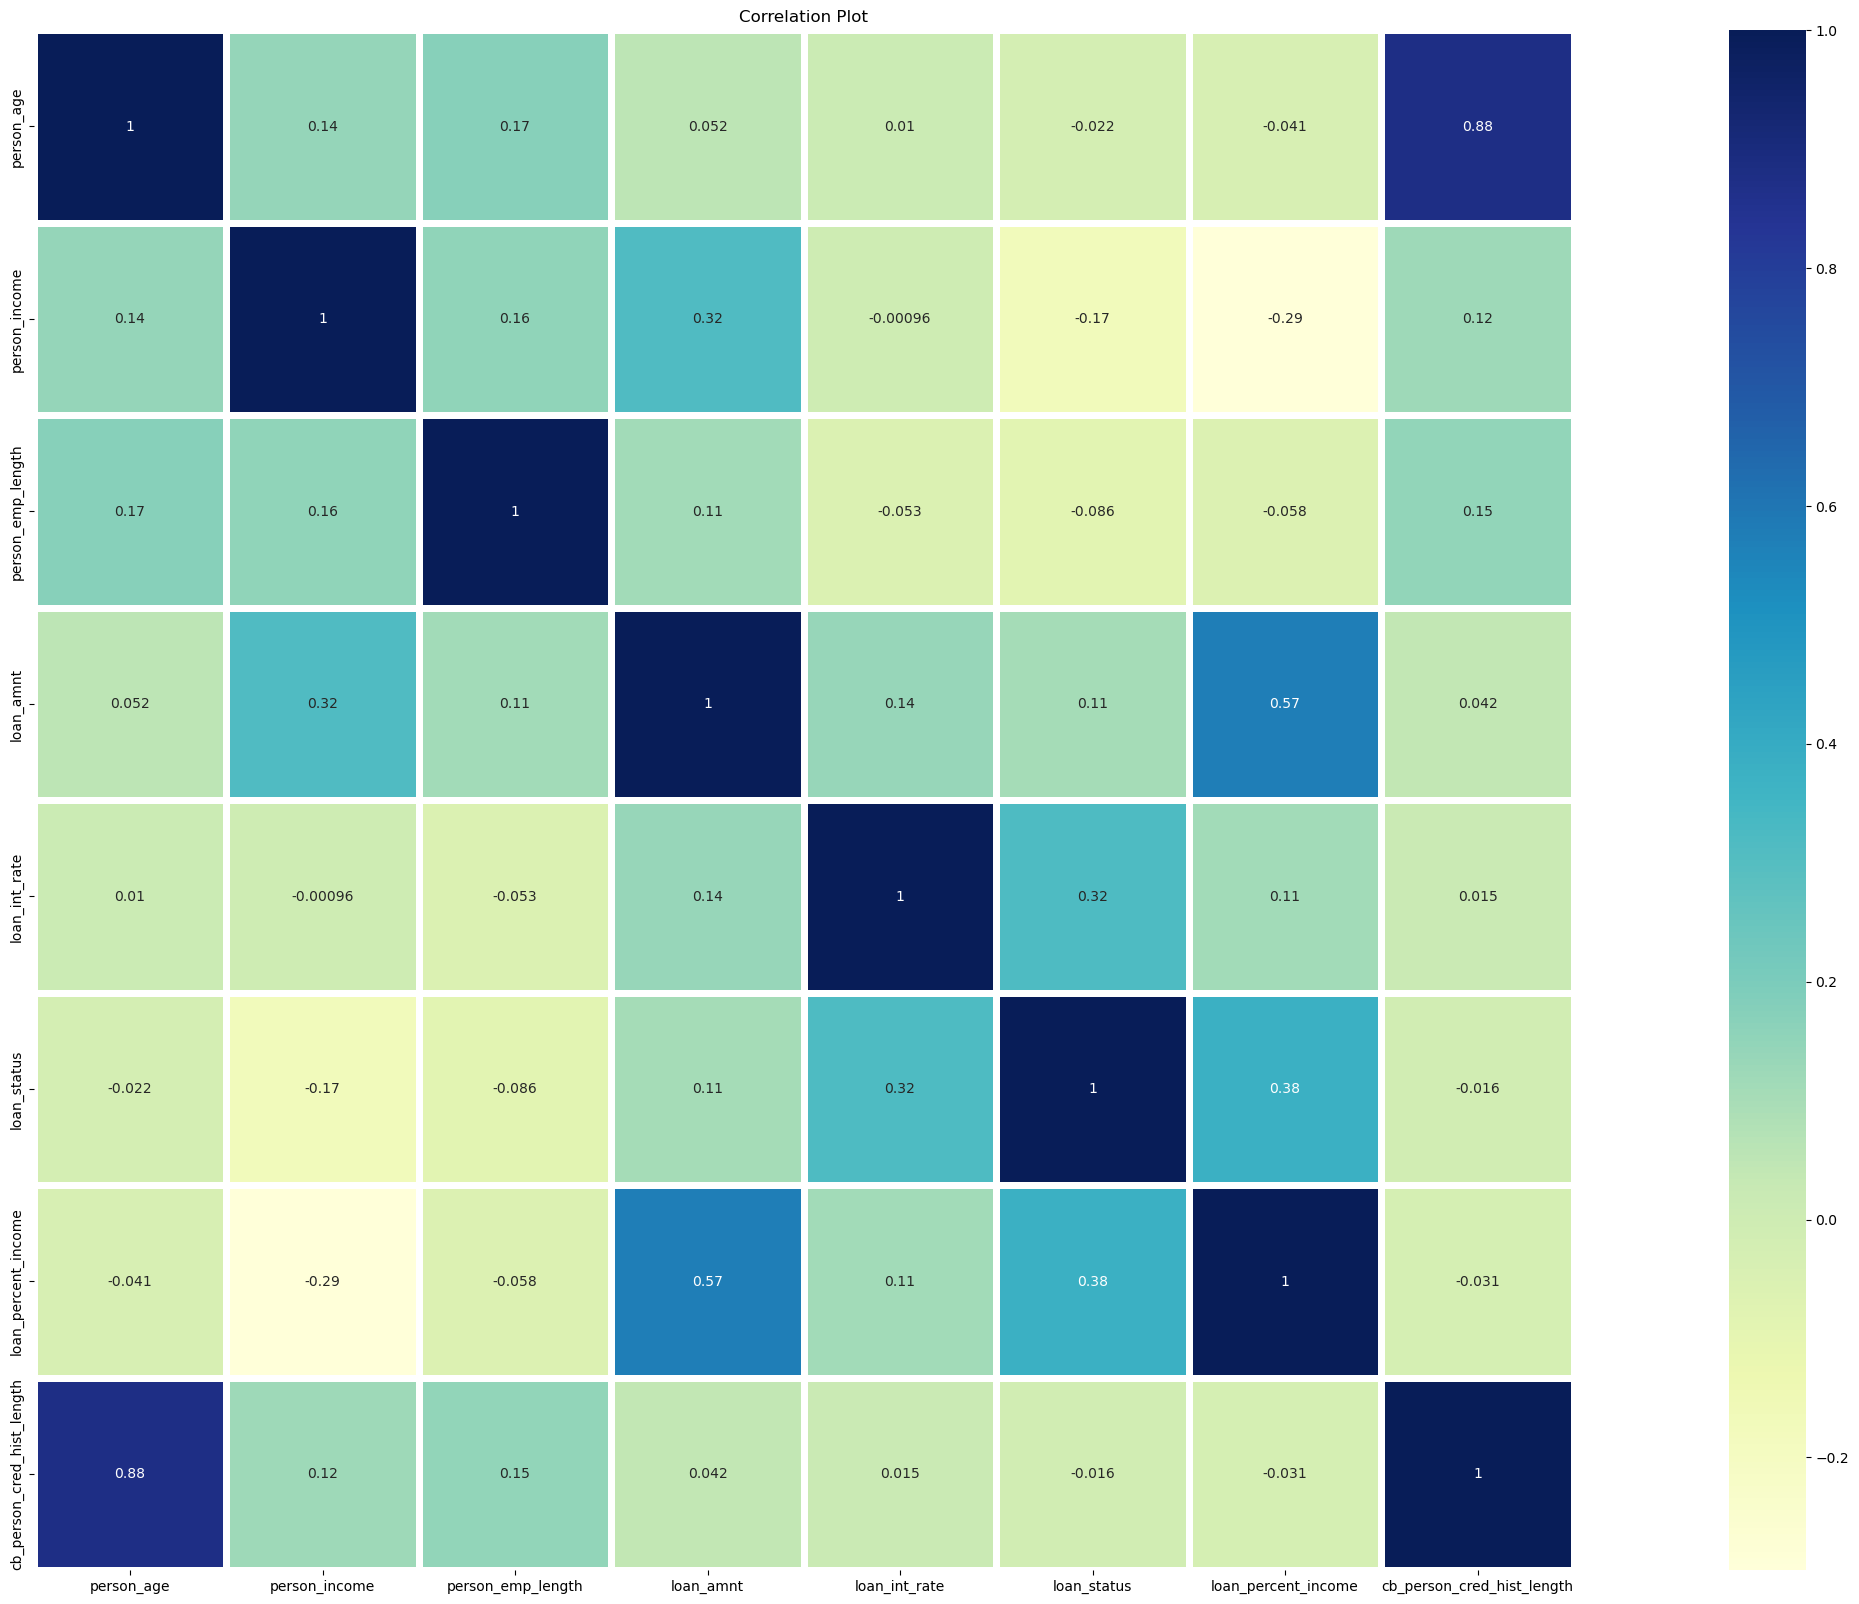

In [19]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(numerical_columns.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')
plt.show()

In [20]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.50
high_correlation_mask = correlation_matrix >= 0.50

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
person_age and cb_person_cred_hist_length
loan_amnt and loan_percent_income


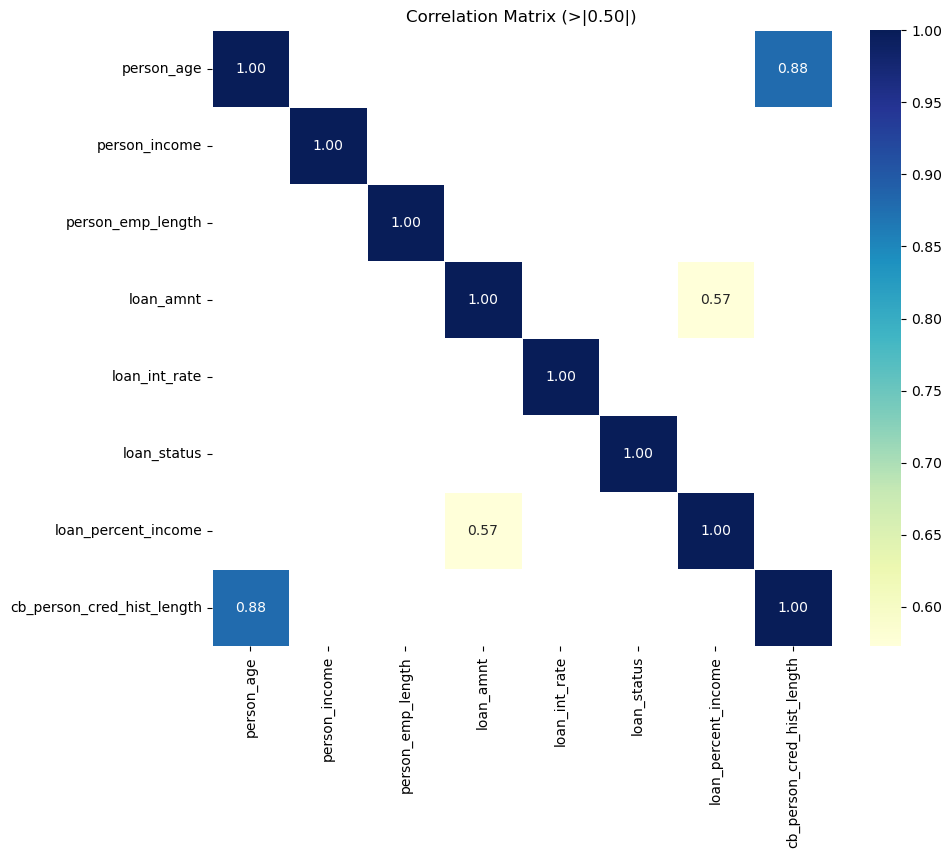

In [21]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.50 or less than or equal to -0.50
high_correlation_mask = (correlation_matrix >= 0.50) | (correlation_matrix <= -0.50)

# Plotting the correlation matrix with annotations for correlations > 0.50 or < -0.50
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=~high_correlation_mask, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (>|0.50|)')
plt.show()

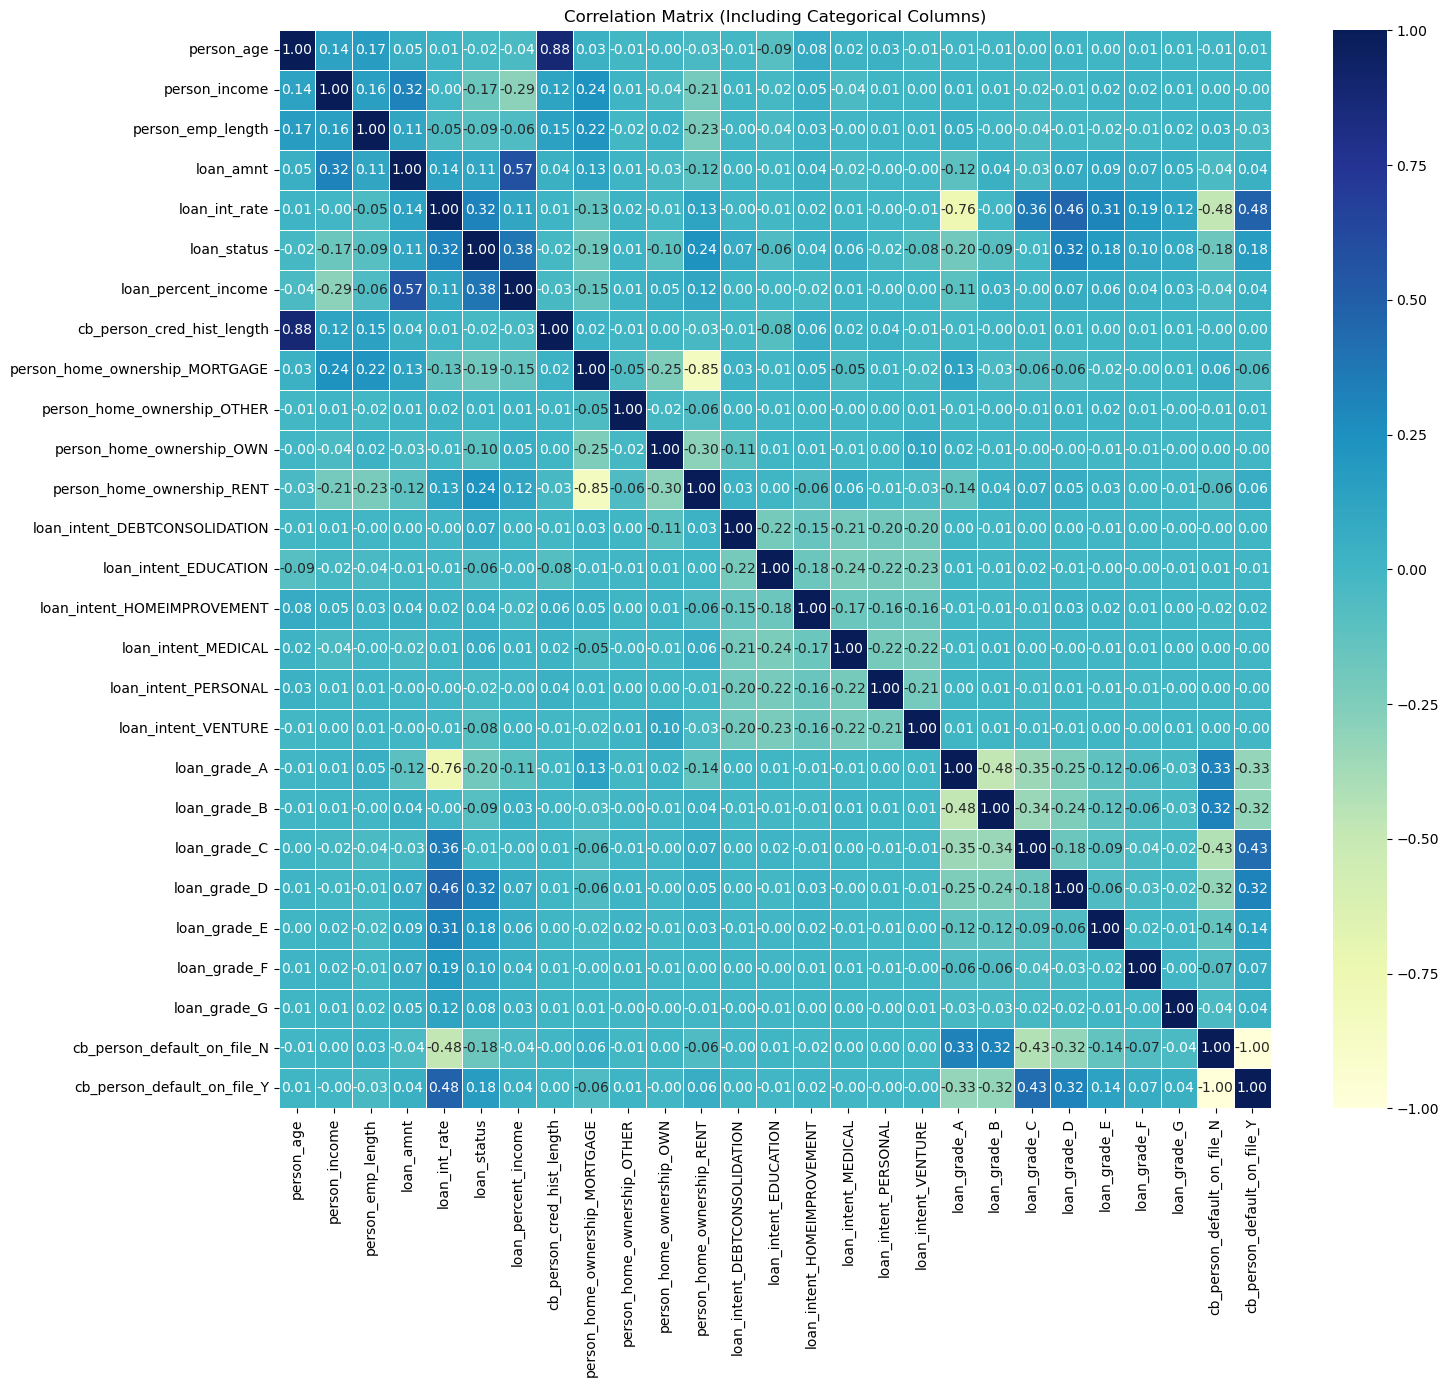

In [22]:
# One-hot encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
encoded_df = pd.get_dummies(df[categorical_columns])

# Concatenate the encoded columns with the numerical columns
concatenated_df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Calculate correlation matrix
correlation_matrix_categorical = concatenated_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_categorical, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Including Categorical Columns)')
plt.show()

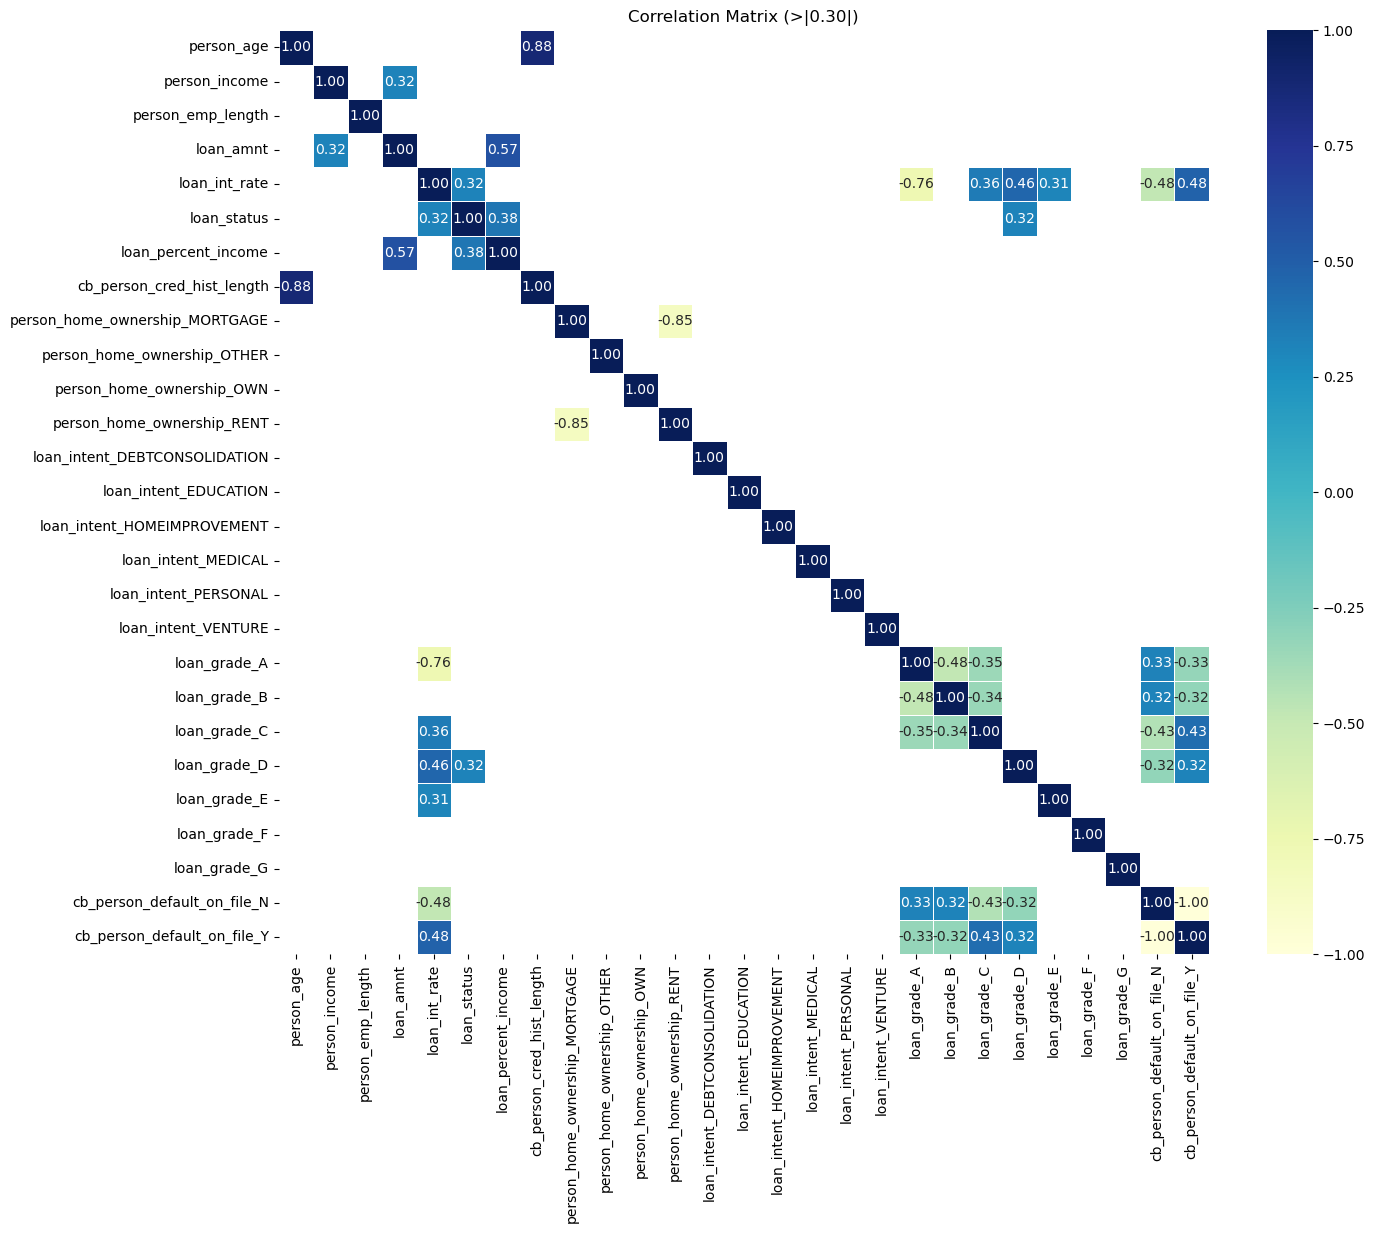

In [23]:
# Calculate correlation matrix
correlation_matrix_categorical = concatenated_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.30 or less than or equal to -0.50
high_correlation_mask = (correlation_matrix_categorical >= 0.30) | (correlation_matrix_categorical <= -0.30)

# Plotting the correlation matrix with annotations for correlations > 0.30 or < -0.30
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_categorical, annot=True, mask=~high_correlation_mask, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (>|0.30|)')
plt.show()

In [25]:
# Calculate the correlation matrix
correlation_matrix = concatenated_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.50
high_correlation_mask = correlation_matrix >= 0.30

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
person_age and cb_person_cred_hist_length
person_income and loan_amnt
loan_amnt and loan_percent_income
loan_int_rate and loan_status
loan_int_rate and loan_grade_C
loan_int_rate and loan_grade_D
loan_int_rate and loan_grade_E
loan_int_rate and cb_person_default_on_file_Y
loan_status and loan_percent_income
loan_status and loan_grade_D
loan_grade_A and cb_person_default_on_file_N
loan_grade_B and cb_person_default_on_file_N
loan_grade_C and cb_person_default_on_file_Y
loan_grade_D and cb_person_default_on_file_Y
